In [4]:
#Importing necessary libraries

import pandas as pd
import numpy as np

#plotting liberaries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing model

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression


#Importing metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score



#feature Engineering
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn import datasets

import joblib

import warnings
warnings.filterwarnings('ignore')

In [5]:
## Loading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


Findings: Some data in the dataset is "?" which needs to be evaluated for the purpose of replacing or dropping

### Dataset Description



This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

<br><br>

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

​

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



### EDA

In [7]:
df.shape


(32560, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
df.nunique()


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Finding: Upon analysis of the csv file for presence of "?", we have idenfied the following columns:

    Workclass
    Occupation
    Native_country



In [12]:
df['Native_country'].mode()

0     United-States
dtype: object

In [13]:
df['Workclass'].mode()

0     Private
dtype: object

In [14]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

In [15]:
df['Workclass'] = df.Workclass.str.replace('?','Private')
df['Occupation'] = df.Occupation.str.replace('?','Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?','United-States')

In [16]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Age  is :  0
Count of zeros in column  Workclass  is :  0
Count of zeros in column  Fnlwgt  is :  0
Count of zeros in column  Education  is :  0
Count of zeros in column  Education_num  is :  0
Count of zeros in column  Marital_status  is :  0
Count of zeros in column  Occupation  is :  0
Count of zeros in column  Relationship  is :  0
Count of zeros in column  Race  is :  0
Count of zeros in column  Sex  is :  0
Count of zeros in column  Capital_gain  is :  29849
Count of zeros in column  Capital_loss  is :  31041
Count of zeros in column  Hours_per_week  is :  0
Count of zeros in column  Native_country  is :  0
Count of zeros in column  Income  is :  0


Findings:

    Out of 32560 rows, number of zeroes in Capital_gain is 29849, i.e. over 91% of the data.
    Out of 32560 rows, number of zeroes in Capital_loss is 31041, i.e. over 95% of the data.

Therefore, it is safe to remove these columns

Observation: It is safe to say that the target class is imbalanced and will require balancing, preferably using SMOTE

In [17]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.drop("Capital_gain",axis=1,inplace=True)


In [19]:
df.drop("Capital_loss",axis=1,inplace=True)

In [20]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [21]:
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

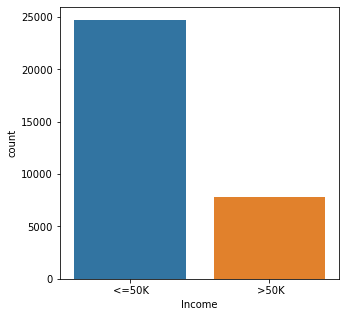

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(df['Income'])
plt.show()

Observation: It is safe to say that the target class is imbalanced and will require balancing, preferably using SMOTE

In [23]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


## Identifying and separating categorical and numerical columns for analysis and visualization

In [24]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [25]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


## Data Visualization

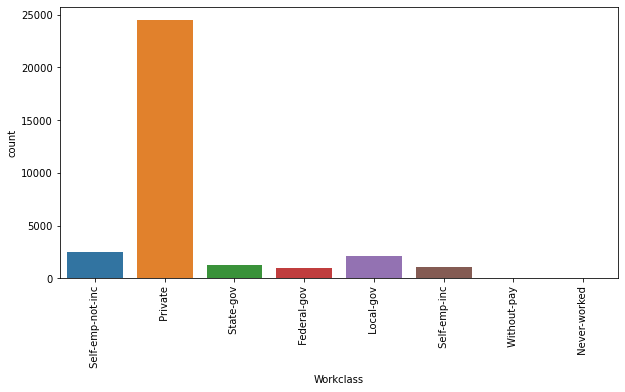

In [26]:
# workclass
plt.figure(figsize=(10,5))
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

It is clear that most people are working in the private sector

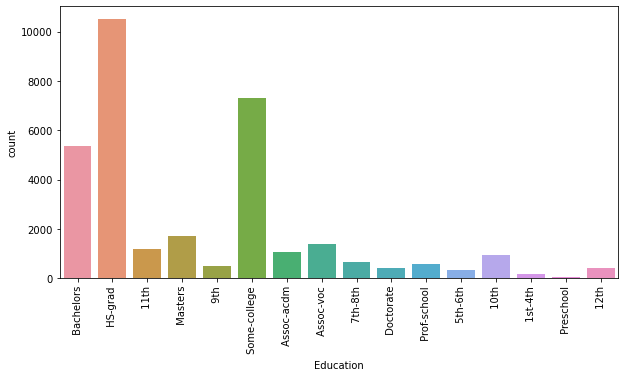

In [27]:
# education
plt.figure(figsize=(10,5))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

Most people are high school graduates, followed by some college education and a bachelors degree

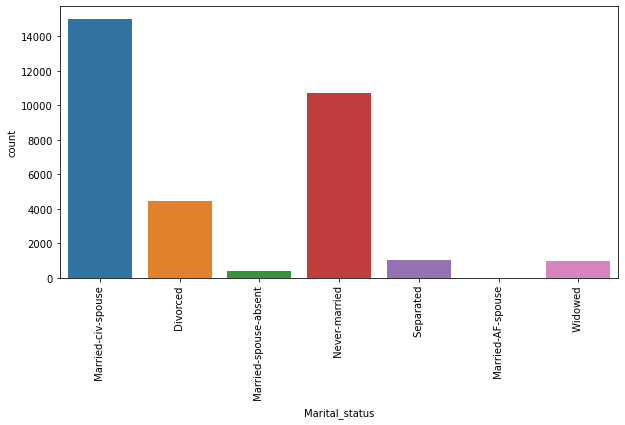

In [28]:
# marital status
plt.figure(figsize=(10,5))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

Most people are married with civilian spouse, followed by those who were never married, and divorced. The least are in the category of married with armed forces spouse.

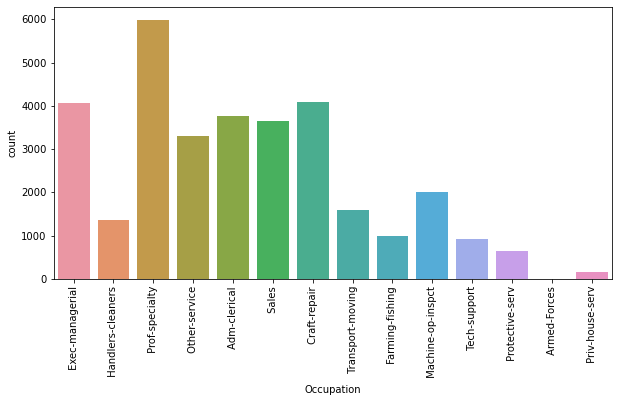

In [29]:
# occupation
plt.figure(figsize=(10,5))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

Most people are in Prof-specialty and least are in Armed-Forces.

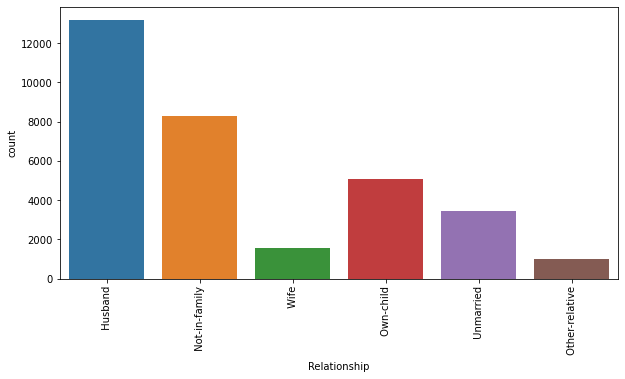

In [30]:
# Relationship
plt.figure(figsize=(10,5))
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show()

Highest counts are in 'Husband', followed by 'Not-in-family', 'Own-child' and 'Unmarried'.

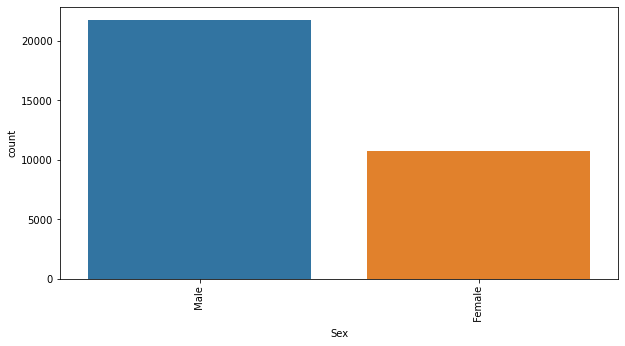

In [31]:
# Sex
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show()

Number of males are higher than the females

In [32]:
print(df['Native_country'].value_counts())

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

It is clear that most people are from the United States, followed by Mexico, Phillippines, Germany and Canada. The least number of people are natives of Holand-Netherlands

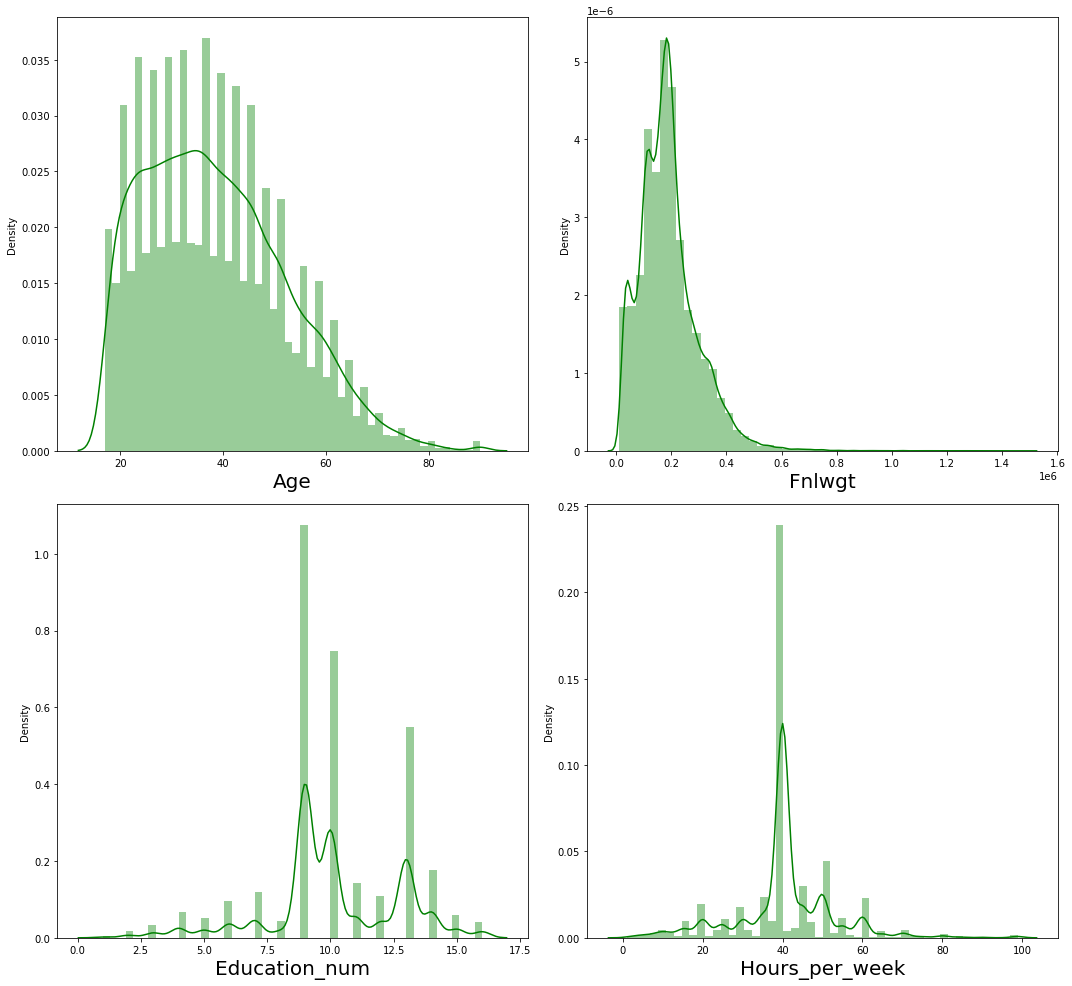

In [33]:
plt.figure(figsize=(15,20))
plotnumber=1

for col in numerical_col:
    if plotnumber<6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Findings:**
1. Age appears to have a normal distribution but is slightly skewed to the right.
2. Other columns are not normalised, with Fnlwgt having right skewness.

<Figure size 720x720 with 0 Axes>

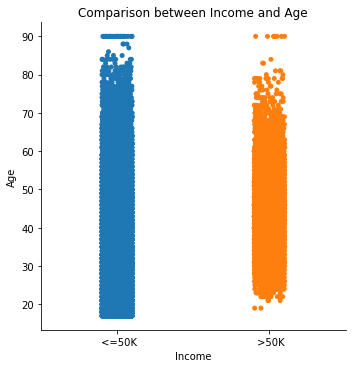

In [34]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='strip')
plt.title('Comparison between Income and Age')
plt.show()

Younger people have a higher concentration in income less than or equal to 50K. The same goes for people above the age of 80 as well.

<Figure size 720x720 with 0 Axes>

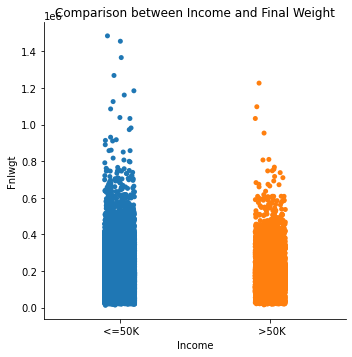

In [35]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt',data=df,kind='strip')
plt.title('Comparison between Income and Final Weight')
plt.show()

<Figure size 720x720 with 0 Axes>

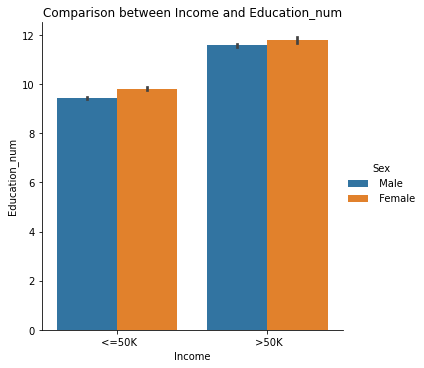

In [36]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex")
plt.title('Comparison between Income and Education_num')
plt.show()

Higher Education number shows income levels higher than 50K. 

<Figure size 720x720 with 0 Axes>

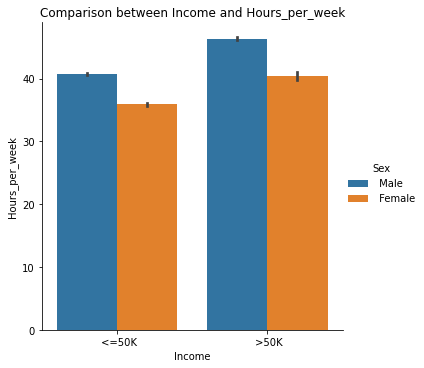

In [37]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Hours_per_week',data=df,kind='bar',hue='Sex')
plt.title('Comparison between Income and Hours_per_week')
plt.show()

More number of hours per week sees higher than 50K income.

<Figure size 720x720 with 0 Axes>

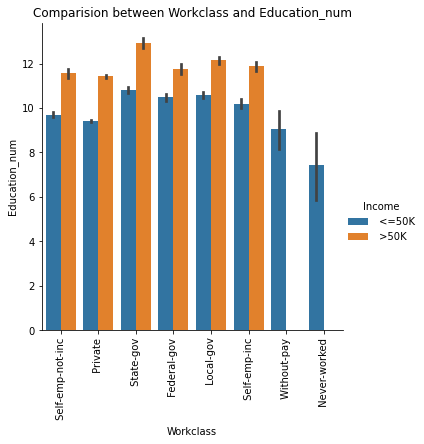

In [38]:
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

People with govt jobs with higher education number have income higher than 50K. 

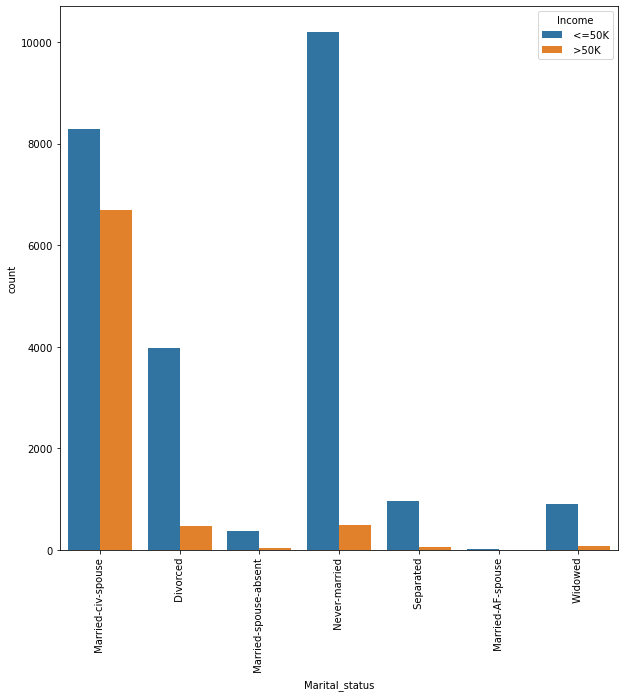

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

People who never married are higher in number with income less than or equal to 50K. This is followed by people who are married with civilian spouses.

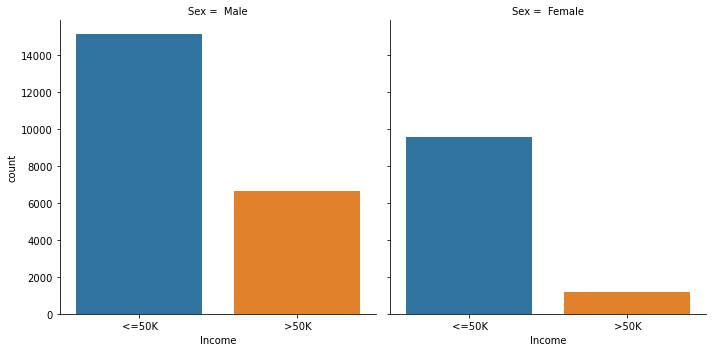

In [40]:
sns.catplot(x='Income',col='Sex',data=df,kind='count')
plt.show()

Most males are having income less than or equal to 50K. There are very few females earning more than 50K.

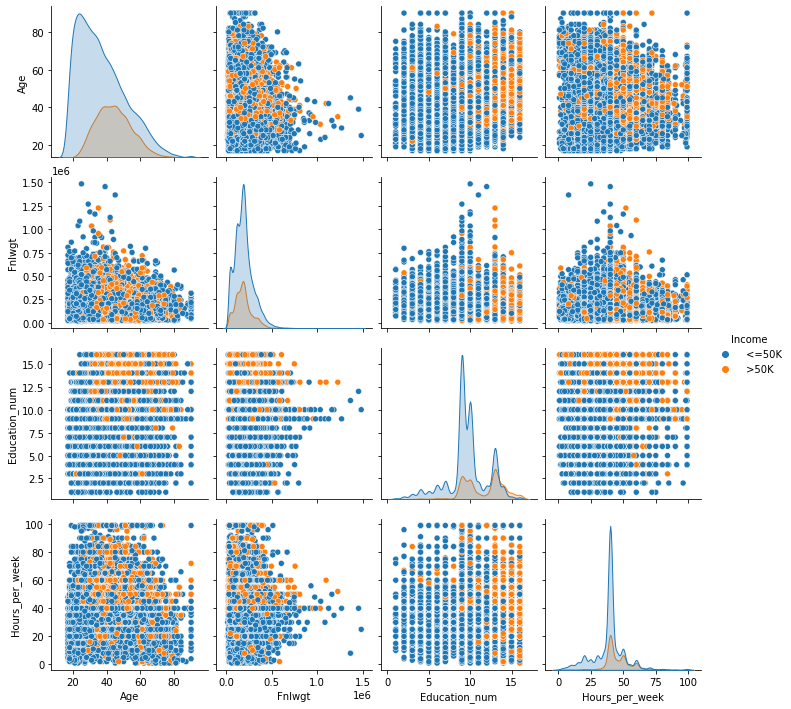

In [41]:
sns.pairplot(df,hue="Income")

Most features are highly correlated to each other. We can also see the presence of outliers and skewness in the data.

### Outlier Check

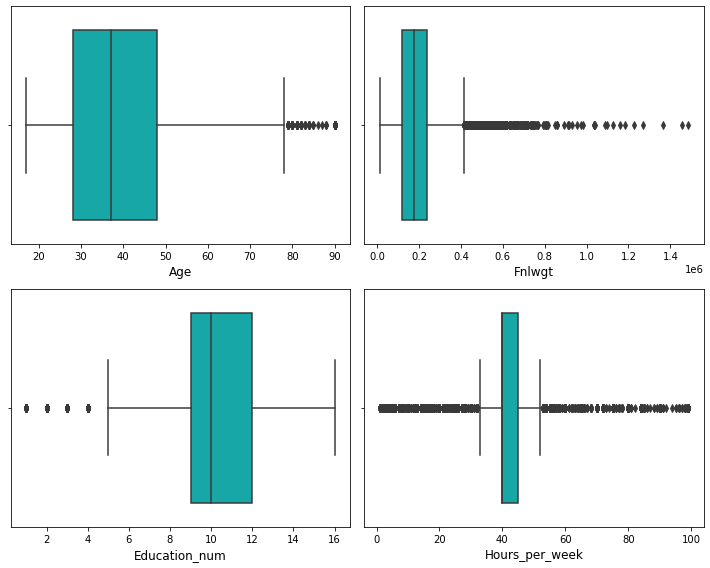

In [42]:
plt.figure(figsize=(10,8))
plotnumber=1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color='c')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

All columns with numerical values have outliers present in them

In [43]:
col = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]
z = np.abs(zscore(col))
z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [44]:
new_df = df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [45]:
print(df.shape)
print(new_df.shape)

(32560, 13)
(31461, 13)


In [46]:
loss = (32560-31461)/32560*100
loss

3.3753071253071254

Data loss is only 3.3753%, which is acceptable.

### Skewness Check

In [47]:
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [48]:
new_df["Fnlwgt"] = np.cbrt(df['Fnlwgt'])
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

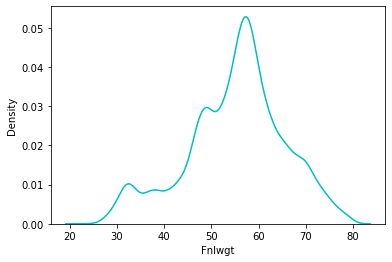

In [49]:
sns.distplot(new_df["Fnlwgt"],color="c",hist=False)

Skewness has been removed

### Encoding categorical data

In [50]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [51]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,0,38,0
32556,3,10,2,6,0,4,1,38,1
32557,3,10,6,0,4,4,0,38,0
32558,3,10,4,0,3,4,1,38,0


All categorical data has now been encoded, and thus, we move to correlation check.

### Establishing correlation

In [52]:
corr = new_df.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.062328,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021663,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.062328,-0.021663,1.000000,-0.024056,-0.031874,0.026902,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.000447,0.004652,-0.024056,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.031874,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.026902,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001524,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.009060,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.006959,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.023307,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


<AxesSubplot:>

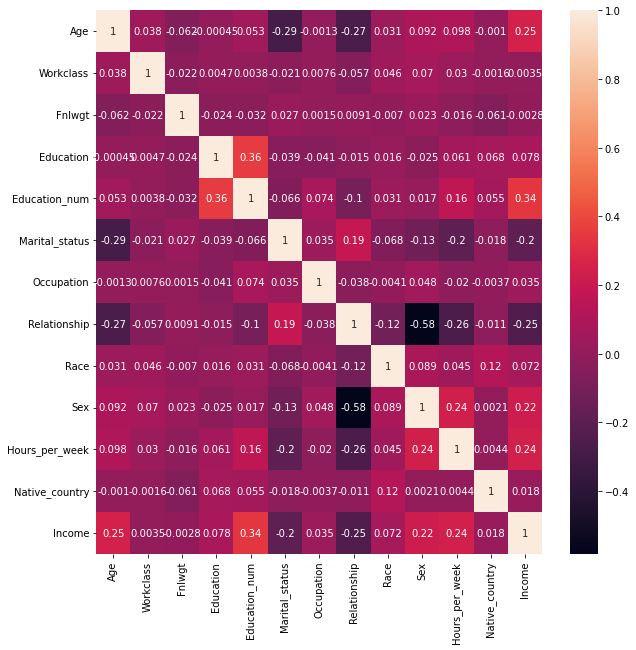

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)

**Findings:**
1. Education_num, Age, Sex and Hours_per_week have positive correlation with target column (income)
2. Relationship and Sex are highly correlated with each other
3. Fnlwgt has very little correlation with income

In [54]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Education         0.077526
Race              0.072451
Occupation        0.034612
Native_country    0.017698
Workclass         0.003494
Fnlwgt           -0.002780
Marital_status   -0.198475
Relationship     -0.251506
Name: Income, dtype: float64

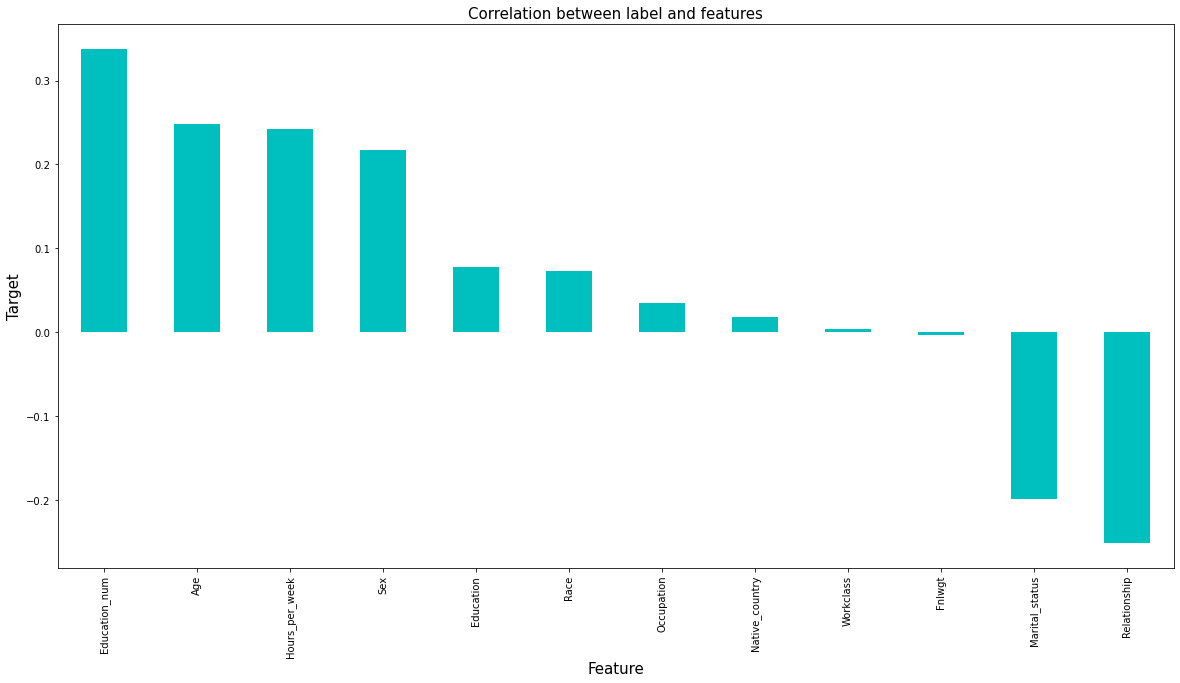

In [55]:
plt.figure(figsize=(20,10))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and features',fontsize=15)
plt.show()

Fnlwgt and Workclass has very low correlation with Income.

### Features and Label

In [56]:
x = new_df.drop("Income",axis=1)
y = new_df["Income"]

In [57]:
print(x.shape,"\n")
print(y.shape)

(31461, 12) 

(31461,)


### Using StandardScaler

In [58]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.102052,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.464976,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.630260,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.399791,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.023711,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,-0.080441,0.814728,-0.942469,0.750829,-0.403597,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,-0.080441,-0.143169,0.245782,-0.459657,-0.403597,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,-0.080441,-0.170768,0.245782,-0.459657,2.255438,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,-0.080441,0.335900,0.245782,-0.459657,0.925921,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


Data has been scaled

### Fixing data imbalance

In [59]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [60]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [61]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

In [62]:
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,43.675121,8,13,2,3,0,4,1,13,38,0
1,38,3,59.967204,10,9,0,5,1,4,1,40,38,0
2,53,3,61.685627,1,7,2,5,0,2,1,40,38,0
3,28,3,69.686283,8,13,2,9,5,2,0,40,4,0
4,37,3,65.776255,11,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,63.603506,6,12,2,12,5,4,0,38,38,0
32556,40,3,53.644440,10,9,2,6,0,4,1,40,38,1
32557,58,3,53.357498,10,9,6,0,4,4,0,40,38,0
32558,22,3,58.625222,10,9,4,0,3,4,1,20,38,0


### Model Building

In [63]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,random_state=i,test_size=.20)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8436386501781598 at random_state 106


In [64]:
x_train,x_test,y_train,y_test = TTS(x,y,random_state=maxRS,test_size=.20)

In [65]:
# DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8463634458184867
[[3975  771]
 [ 695 4101]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4746
           1       0.84      0.86      0.85      4796

    accuracy                           0.85      9542
   macro avg       0.85      0.85      0.85      9542
weighted avg       0.85      0.85      0.85      9542



In [66]:
# RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8863969817648292
[[4146  600]
 [ 484 4312]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4746
           1       0.88      0.90      0.89      4796

    accuracy                           0.89      9542
   macro avg       0.89      0.89      0.89      9542
weighted avg       0.89      0.89      0.89      9542



In [67]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7545587927059316
[[3500 1246]
 [1096 3700]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4746
           1       0.75      0.77      0.76      4796

    accuracy                           0.75      9542
   macro avg       0.75      0.75      0.75      9542
weighted avg       0.75      0.75      0.75      9542



In [68]:
# KNeighborsClassifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8485642422972123
[[3668 1078]
 [ 367 4429]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4746
           1       0.80      0.92      0.86      4796

    accuracy                           0.85      9542
   macro avg       0.86      0.85      0.85      9542
weighted avg       0.86      0.85      0.85      9542



### Model Cross Validation

In [69]:
print("Cross Validation Score for Decision Tree Classifier:",cross_val_score(DTC,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for Random Forest Classifier:",cross_val_score(RFC,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for Logistic Regression:",cross_val_score(LR,x,y,cv=5).mean(),"\n")
print("Cross Validation Score for KNeighbors Classifier:",cross_val_score(knn,x,y,cv=5).mean(),"\n")

Cross Validation Score for Decision Tree Classifier: 0.8319934347260268 

Cross Validation Score for Random Forest Classifier: 0.8830351182579497 

Cross Validation Score for Logistic Regression: 0.7520649455358314 

Cross Validation Score for KNeighbors Classifier: 0.8471894411681026 



It is evident from the accuracy scores and cross validation scores that Random Forest Classifier is the best model for the dataset prediction of income classification.

## Hyperparameter Tuning

In [70]:
parameters = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40],
             "min_samples_leaf":[2,3,4,5]}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5]})

In [73]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2}

**Results of the best parameters were as folows:<br>**
'criterion': `'entropy'`,  'max_depth': `40`,  'max_features': `'auto'`,  'min_samples_leaf': `2`

In [74]:
best_mod = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='auto',min_samples_leaf=2)
best_mod.fit(x_train, y_train)
pred = best_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.62921819325089


In [75]:
print("The accuracy of Random Forest Classifier after hyperparameter tuning is",acc*100,"%")

The accuracy of Random Forest Classifier after hyperparameter tuning is 88.62921819325089 %


### Plotting ROC curves and comparison of AUC

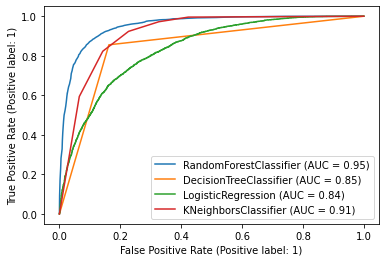

In [76]:
disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

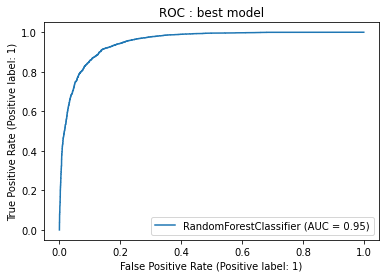

In [77]:
plot_roc_curve(best_mod, x_test, y_test)
plt.title("ROC : best model")
plt.show()

## Saving the model

In [78]:
joblib.dump(best_mod,"Census Income Project - Prediction.pkl")

['Census Income Project - Prediction.pkl']

In [79]:
model=joblib.load("Census Income Project - Prediction.pkl")
prediction = model.predict(x_test)
prediction

array([1, 0, 0, ..., 1, 0, 0])

In [80]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,9532,9533,9534,9535,9536,9537,9538,9539,9540,9541
Predicted,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
Original,1,0,0,1,1,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
